In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Datasets/Churn_Modelling.csv")

In [4]:
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4911,4912,15691004,Yu,407,Spain,Male,37,1,0.00,1,1,1,49161.12,1
7834,7835,15797165,Bergamaschi,703,France,Male,56,9,0.00,1,0,0,85547.33,1
4256,4257,15578462,Hs?,596,Spain,Female,76,9,134208.25,1,1,1,13455.43,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [10]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Univariate Analysis:

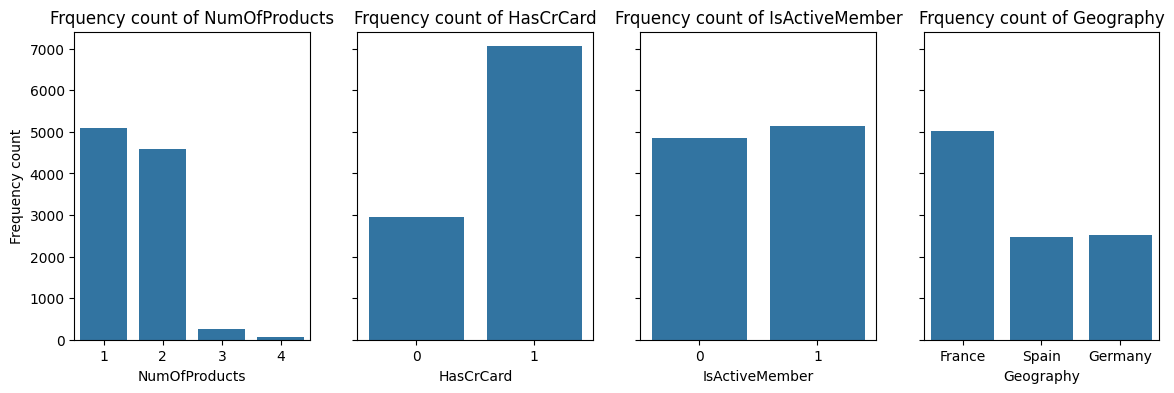

In [37]:
fig, ax = plt.subplots(figsize=(14,4),ncols=4,sharey=True)

col = ['NumOfProducts','HasCrCard','IsActiveMember','Geography']

for i in col:
    sns.countplot(data=df,x=i,ax=ax[col.index(i)])
    ax[col.index(i)].set_title("Frquency count of "+i)
    ax[col.index(i)].set_xlabel(i)
    ax[col.index(i)].set_ylabel("Frequency count")

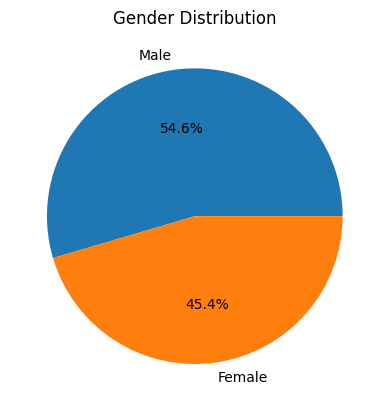

In [ ]:
plt.pie(df['Gender'].value_counts(),autopct='%0.01f%%',labels=['Male','Female'])
plt.title('Gender Distribution')
plt.show()

In [28]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

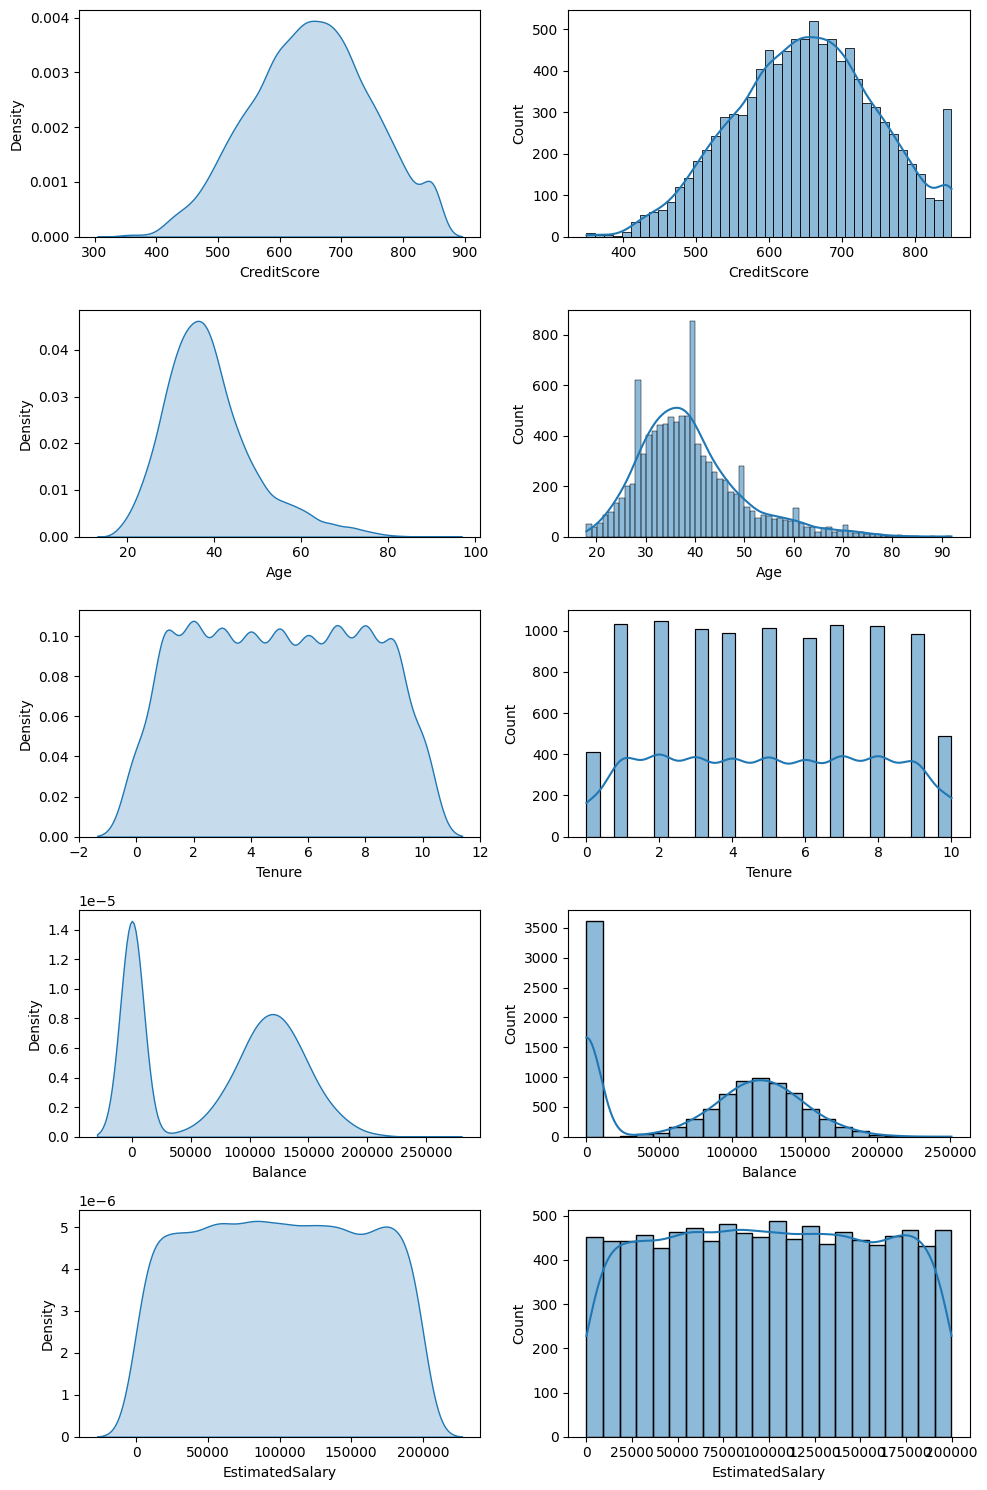

In [46]:
fig, axes = plt.subplots(figsize=(10, 15), ncols=2, nrows=5)

col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for i in range(len(col)):
    sns.kdeplot(data=df, x=col[i], fill=True, ax=axes[i,0])
    sns.histplot(data=df, x=col[i], kde=True, ax=axes[i,1])

plt.tight_layout()
plt.show()
